In [91]:
import getdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [92]:
# getting csv and selecting relevant columns
countries_df = getdata.netflix_df.copy()
countries_df = countries_df[['title','type','release_year','age_certification','runtime','genres','production_countries','imdb_score','imdb_votes']]
countries_df.dropna(subset="imdb_score",inplace=True)

In [93]:
# tester df to mess around with
tester_df = countries_df.copy()
tester_df.dropna(subset="imdb_score",inplace=True)

tester_df

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],8.2,808582.0
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0
4,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7,72662.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],8.8,73424.0
...,...,...,...,...,...,...,...,...,...
5843,My Bride,MOVIE,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],5.0,327.0
5845,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],6.8,45.0
5846,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],[],7.7,348.0
5847,Lokillo,MOVIE,2021,NaN,90,['comedy'],['CO'],3.8,68.0


In [94]:
# checking for nulls
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, 1 to 5849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5368 non-null   object 
 1   type                  5368 non-null   object 
 2   release_year          5368 non-null   int64  
 3   age_certification     3033 non-null   object 
 4   runtime               5368 non-null   int64  
 5   genres                5368 non-null   object 
 6   production_countries  5368 non-null   object 
 7   imdb_score            5368 non-null   float64
 8   imdb_votes            5352 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 419.4+ KB


In [95]:
# removing null for title
countries_df.dropna(subset="title",inplace=True)
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5368 entries, 1 to 5849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5368 non-null   object 
 1   type                  5368 non-null   object 
 2   release_year          5368 non-null   int64  
 3   age_certification     3033 non-null   object 
 4   runtime               5368 non-null   int64  
 5   genres                5368 non-null   object 
 6   production_countries  5368 non-null   object 
 7   imdb_score            5368 non-null   float64
 8   imdb_votes            5352 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 419.4+ KB


In [96]:
# total number of movies/shows, total number of movies, and total number of shows per country (also dropping unknowns)
total_count = countries_df['production_countries'].value_counts()
movies_count = countries_df[['type','production_countries']].loc[
    countries_df[['type','production_countries']]['type']=='MOVIE'].value_counts()
shows_count = countries_df[['type','production_countries']].loc[
    countries_df[['type','production_countries']]['type']=='SHOW'].value_counts()

# creating single dataframe with above info
counts = pd.merge(pd.merge(movies_count,shows_count,on='production_countries'
                  ), total_count,on='production_countries').rename(columns={'count_x':'# of Movies',
                                                                            'count_y':'# of Shows',
                                                                            'count':'# of Movies/Shows'}).reset_index(inplace=False)
# dropping unknown countries
counts = counts.drop(2)
total_count = counts[['production_countries','# of Movies/Shows']].sort_values('# of Movies/Shows',ascending=False)
movies_count = counts[['production_countries','# of Movies']].sort_values('# of Movies',ascending=False)
shows_count = counts[['production_countries','# of Shows']].sort_values('# of Shows',ascending=False)
counts


,production_countries,# of Movies,# of Shows,# of Movies/Shows
0,['US'],1081,741,1822
1,['IN'],530,38,568
3,['JP'],89,153,242
4,['ES'],87,66,153
5,['GB'],82,122,204
...,...,...,...,...
70,"['AU', 'GB']",1,1,2
71,"['AT', 'DE']",1,1,2
72,['BE'],1,8,9
73,"['FR', 'DE']",1,1,2


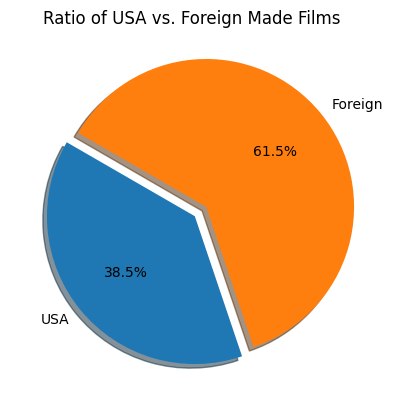

In [97]:
# ratio of US films vs. foreign
us_count = 1822
foreign_count = total_count['# of Movies/Shows'].sum()-us_count
ratio_count = [us_count,foreign_count]
labels = ['USA','Foreign']
plt.pie(ratio_count,labels=labels,autopct="%1.1f%%", shadow=True, startangle=150, explode = (0, .1) )
plt.title('Ratio of USA vs. Foreign Made Films ')

plt.show()

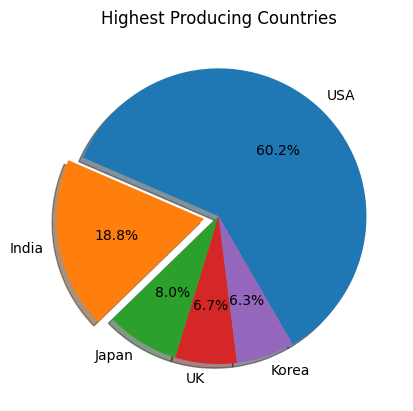

In [98]:
# countries with most productions

# identifying top 5 production countries
highest_counts = total_count.loc[total_count['# of Movies/Shows']>161, :]

# making variables of countries and count for pie chart
countries = ['USA','India','Japan','UK','Korea']
count = highest_counts['# of Movies/Shows']

# pie chart of top 5 countries
highest_counts_pie = plt.pie(count,labels=countries,autopct="%1.1f%%", shadow=True, startangle=300, explode = (0,0.1,0,0,0) )
plt.title("Highest Producing Countries");


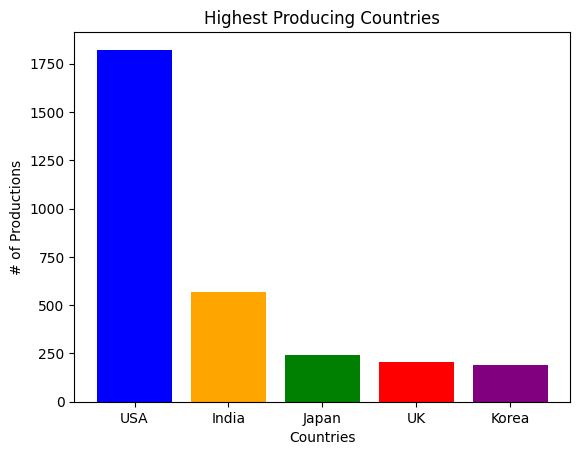

In [99]:
# or bar chart
colors = ['blue','orange','green','red','purple']
plt.bar((np.arange(len(countries))), count, color=colors, align="center")
tick_locations = [value for value in (np.arange(len(countries)))]
plt.xticks(tick_locations, countries)
plt.title("Highest Producing Countries")
plt.xlabel("Countries")
plt.ylabel("# of Productions");

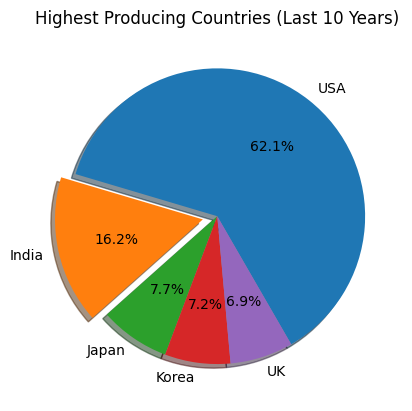

In [100]:
# highest # of productions in last 10 years

# filtering to last 10 years (plus some clean up)
recent_counts = countries_df.loc[countries_df['release_year']>2011]['production_countries'].value_counts().to_frame().reset_index(inplace=False)

# top 5 in last 10 years
recent_highest_counts = recent_counts.loc[recent_counts['count']>168, :]

# making variables of countries and count for pie chart (last 10 years)
recent_countries = ['USA','India','Japan','Korea','UK']
recent_count = recent_highest_counts['count']

# pie chart of top 5 countries in last 10 years
recent_highest_count_pie = plt.pie(recent_count,labels=recent_countries,autopct="%1.1f%%", shadow=True, startangle=300, explode = (0,0.1,0,0,0))
plt.title("Highest Producing Countries (Last 10 Years)")
recent_highest_count_pie;

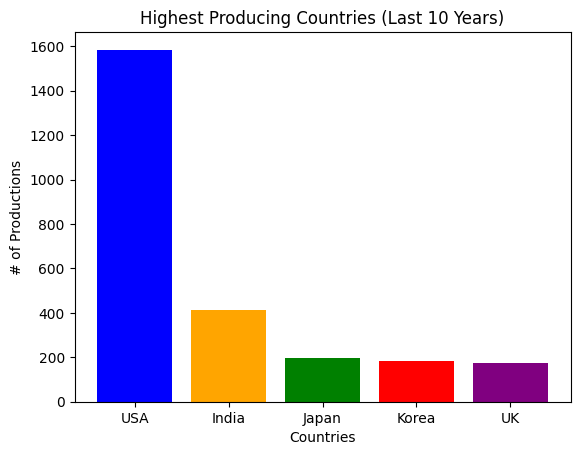

In [101]:
# or bar graph
colors1 = ['blue','orange','green','red','purple']
plt.bar((np.arange(len(recent_countries))), recent_count, color=colors1, align="center")
tick_locations = [value for value in (np.arange(len(recent_countries)))]
plt.xticks(tick_locations, recent_countries)
plt.title("Highest Producing Countries (Last 10 Years)")
plt.xlabel("Countries")
plt.ylabel("# of Productions");

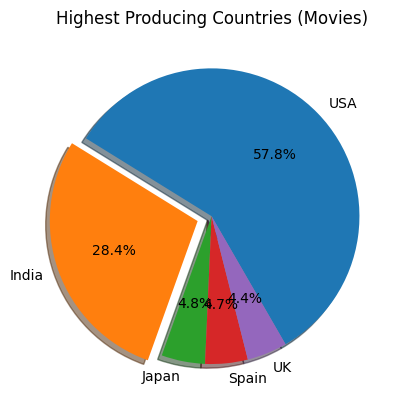

In [102]:
# highest # of productions for movies
highest_movies_count = movies_count.loc[movies_count['# of Movies']>76, :]
movies_countries = ['USA','India','Japan','Spain','UK']
movies_count_p = highest_movies_count['# of Movies']
movies_count_pie = plt.pie(movies_count_p,labels=movies_countries,autopct="%1.1f%%", shadow=True, startangle=300, explode=(0,0.1,0,0,0))
plt.title("Highest Producing Countries (Movies)")
movies_count_pie;


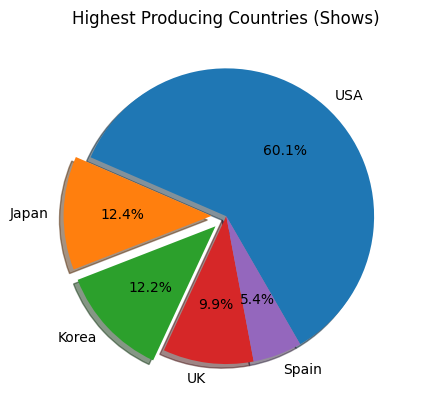

In [103]:
# highest # of productions for shows
highest_shows_count = shows_count.loc[shows_count['# of Shows']>54, :]
shows_countries = ['USA','Japan','Korea','UK','Spain']
shows_count_p = highest_shows_count['# of Shows']
shows_count_pie = plt.pie(shows_count_p,labels=shows_countries,autopct="%1.1f%%", shadow=True, startangle=300,explode=(0,0.1,0.1,0,0))
plt.title("Highest Producing Countries (Shows)")
shows_count_pie;

# interesting that india is not included on list of shows

In [104]:
# highest average imdb score out of the countries with most productions

# creating a df with only the relevant countries
imdb_score_df = countries_df.loc[(countries_df['production_countries']=="['US']")|
                 (countries_df['production_countries']=="['IN']")|
                 (countries_df['production_countries']=="['JP']")|
                 (countries_df['production_countries']=="['KR']")|
                 (countries_df['production_countries']=="['GB']")]


highest_imdb_score = imdb_score_df[['production_countries','imdb_score']].groupby(['production_countries']).mean().sort_values('imdb_score',ascending=False)
highest_imdb_score

,imdb_score
production_countries,
['KR'],7.247917
['JP'],7.053719
['GB'],7.014216
['US'],6.548299
['IN'],6.409331


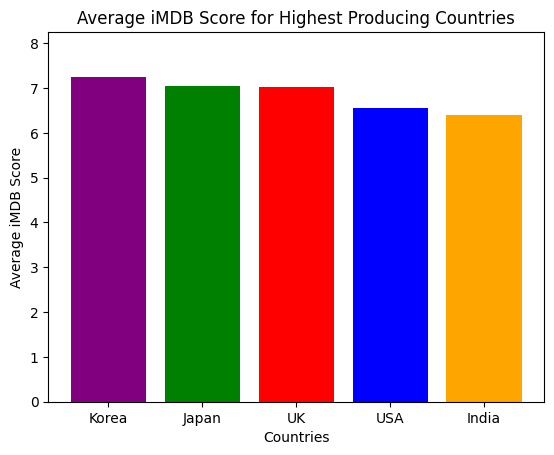

In [105]:
# bar chart of highest average imdb score
colors2 = ['purple','green','red','blue','orange']
bars1 = highest_imdb_score['imdb_score'].tolist()
x_axis1 = np.arange(len(bars1))
country_names = ['Korea','Japan','UK','USA','India']

plt.bar(x_axis1, bars1, align="center",color=colors2)
tick_locations = [value for value in x_axis1]
plt.xticks(tick_locations, country_names)
plt.ylim(0, max(bars1)+1)
plt.title("Average iMDB Score for Highest Producing Countries")
plt.xlabel("Countries")
plt.ylabel("Average iMDB Score")
plt.show()

In [106]:
# movies only - highest average imdb score out of the countries with most productions

imdb_movies = imdb_score_df[['type','production_countries','imdb_score']]
highest_imdb_movies = imdb_movies.loc[imdb_movies['type']=='MOVIE'][['production_countries','imdb_score']].groupby('production_countries').mean()
highest_imdb_movies = highest_imdb_movies.sort_values('imdb_score',ascending=False)
highest_imdb_movies

,imdb_score
production_countries,
['JP'],6.760674
['GB'],6.671951
['IN'],6.383774
['US'],6.310546
['KR'],6.283333


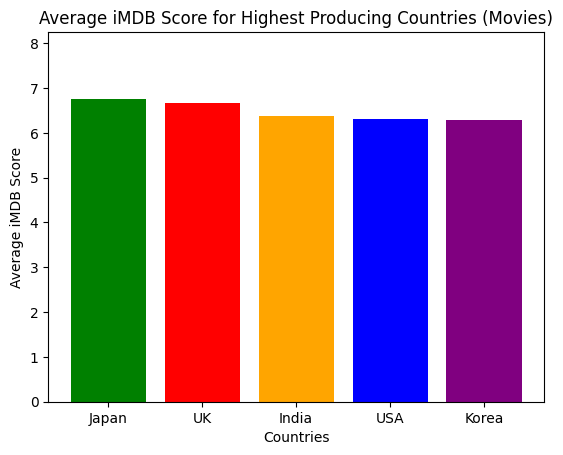

In [107]:
# movies only - bar chart of highest average imdb score
colors3 = ['green','red','orange','blue','purple']
bars2 = highest_imdb_movies['imdb_score'].tolist()
x_axis2 = np.arange(len(bars2))
country_names1 = ['Japan','UK','India','USA','Korea']

plt.bar(x_axis2, bars2, align="center",color=colors3)
tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, country_names1)
plt.ylim(0, max(bars1)+1)
plt.title("Average iMDB Score for Highest Producing Countries (Movies)")
plt.xlabel("Countries")
plt.ylabel("Average iMDB Score")
plt.show()

In [108]:
# shows only - highest average imdb score out of the countries with most productions
imdb_shows = imdb_score_df[['type','production_countries','imdb_score']]
highest_imdb_shows = imdb_shows.loc[imdb_shows['type']=='SHOW'][['production_countries','imdb_score']].groupby('production_countries').mean()
highest_imdb_shows.sort_values('imdb_score',ascending=False)

,imdb_score
production_countries,
['KR'],7.518000
['GB'],7.244262
['JP'],7.224183
['US'],6.895142
['IN'],6.765789


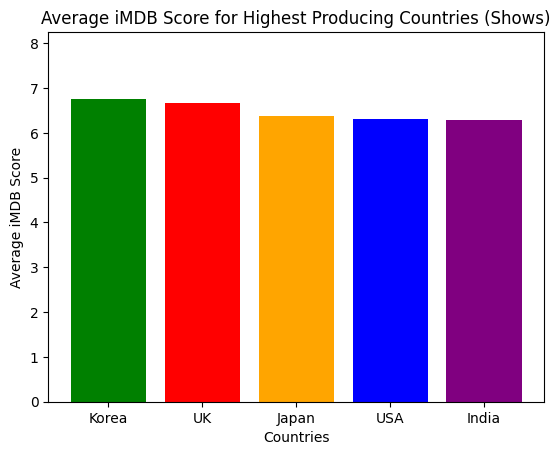

In [109]:
# shows only - bar chart of highest average imdb score
colors4 = ['purple','red','green','blue','purple']
bars3 = highest_imdb_movies['imdb_score'].tolist()
x_axis3 = np.arange(len(bars3))
country_names = ['Korea','UK','Japan','USA','India']

plt.bar(x_axis3, bars3, align="center",color=colors3)
tick_locations = [value for value in x_axis1]
plt.xticks(tick_locations, country_names)
plt.ylim(0, max(bars1)+1)
plt.title("Average iMDB Score for Highest Producing Countries (Shows)")
plt.xlabel("Countries")
plt.ylabel("Average iMDB Score")
plt.show()

In [110]:
# highest average imbd rating out of all countries
countries_imdb_score= countries_df[['production_countries','imdb_score']].groupby(['production_countries']).mean().sort_values('imdb_score',ascending=False)
countries_imdb_score

,imdb_score
production_countries,
"['UA', 'GB', 'US']",8.3
"['CU', 'US']",8.2
"['CD', 'GB']",8.2
"['ZA', 'GB']",8.1
"['US', 'EG', 'GB']",8.1
...,...
"['JP', 'US', 'CA']",3.8
"['MX', 'CO']",3.7
"['CN', 'DE', 'GB']",3.7


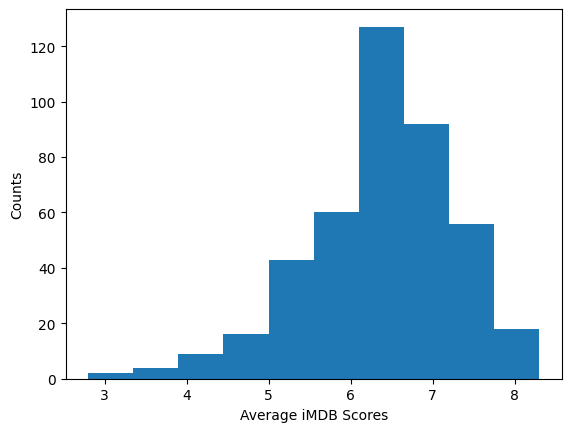

NormaltestResult(statistic=1.9183161009431786, pvalue=0.3832153982103509)


In [150]:
# histogram of average imdb scores
plt.hist(countries_imdb_score['imdb_score'])
plt.xlabel('Average iMDB Scores')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(countries_imdb_score['imdb_score'].sample(50)))

In [112]:
# number of productions vs. average imdb score
count_and_score = (pd.merge(total_count,countries_imdb_score,on='production_countries'))
count_and_score

,production_countries,# of Movies/Shows,imdb_score
0,['US'],1822,6.548299
1,['IN'],568,6.409331
2,['JP'],242,7.053719
3,['GB'],204,7.014216
4,['KR'],192,7.247917
...,...,...,...
69,"['US', 'NG']",2,6.000000
70,"['AU', 'GB']",2,7.500000
71,"['AT', 'DE']",2,5.550000
72,"['FR', 'DE']",2,5.950000


In [113]:
count_and_score.sort_values('imdb_score',ascending=False)

,production_countries,# of Movies/Shows,imdb_score
73,"['US', 'BR']",2,7.750000
70,"['AU', 'GB']",2,7.500000
64,"['US', 'IT']",2,7.450000
67,"['US', 'IL']",2,7.400000
39,['IL'],11,7.336364
...,...,...,...
71,"['AT', 'DE']",2,5.550000
24,['ZA'],30,5.510000
54,['KW'],4,5.450000
40,['AE'],10,4.890000


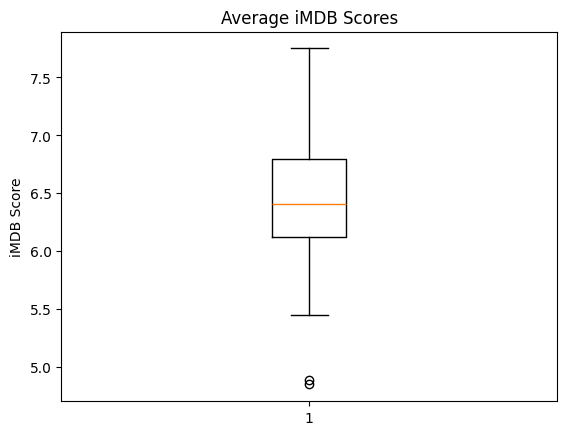

In [115]:
# boxplot (for averages)
mean_imdbs = count_and_score['imdb_score']
fig1, ax1 = plt.subplots()
ax1.set_title('Average iMDB Scores')
ax1.set_ylabel('iMDB Score')
ax1.boxplot(mean_imdbs)
plt.show()

In [122]:
# quartiles and such for average imdb scores
quartiles = mean_imdbs.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print(f"Outlier: {mean_imdbs.loc[mean_imdbs<5.121726190476189]} {mean_imdbs.loc[mean_imdbs>7.80029761904762]}.")

The lower quartile is: 6.126190476190476
The upper quartile is: 6.795833333333333
The interquartile range is: 0.6696428571428577
The the median is: 6.410763053933356 
Values below 5.121726190476189 could be outliers.
Values above 7.80029761904762 could be outliers.
Outlier: 40    4.89
62    4.85
Name: imdb_score, dtype: float64 Series([], Name: imdb_score, dtype: float64).


In [118]:
# stats for average imdb scores
count_and_score['imdb_score'].describe()

count    74.000000
mean      6.452066
std       0.564960
min       4.850000
25%       6.126190
50%       6.410763
75%       6.795833
max       7.750000
Name: imdb_score, dtype: float64

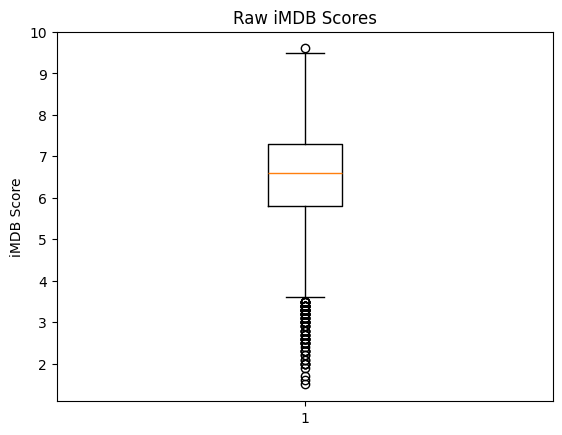

In [147]:
# boxplot (for raw scores)
raw_imdbs = countries_df['imdb_score']
fig2, ax2 = plt.subplots()
ax2.set_title('Raw iMDB Scores')
ax2.set_ylabel('iMDB Score')
ax2.boxplot(raw_imdbs)
plt.show()

In [149]:
quartiles1 = raw_imdbs.quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1

print(f"The lower quartile is: {lowerq1}")
print(f"The upper quartile is: {upperq1}")
print(f"The interquartile range is: {iqr1}")
print(f"The the median is: {quartiles1[0.5]} ")

lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

print(f"Outlier: {raw_imdbs.loc[raw_imdbs<lower_bound1]} {raw_imdbs.loc[raw_imdbs>upper_bound1]}.")

The lower quartile is: 5.8
The upper quartile is: 7.3
The interquartile range is: 1.5
The the median is: 6.6 
Values below 3.55 could be outliers.
Values above 9.55 could be outliers.
Outlier: 19      2.1
558     2.9
566     3.4
598     3.4
748     2.0
       ... 
5783    3.0
5793    3.2
5797    2.3
5805    2.6
5823    3.3
Name: imdb_score, Length: 88, dtype: float64 2658    9.6
Name: imdb_score, dtype: float64.


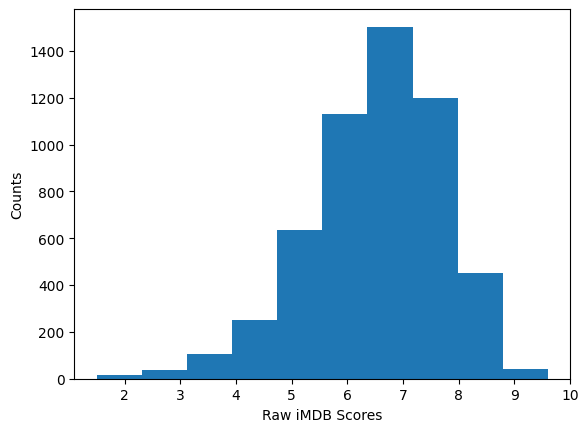

NormaltestResult(statistic=9.81100976404285, pvalue=0.007405703132509656)


In [148]:
# histogram of raw imdb scores
plt.hist(countries_df['imdb_score'])
plt.xlabel('Raw iMDB Scores')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(countries_df['imdb_score'].sample(50)))

In [152]:
# stats for raw imdb scores
countries_df['imdb_score'].describe()

count    5368.000000
mean        6.510861
std         1.163826
min         1.500000
25%         5.800000
50%         6.600000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

In [177]:
# countries with most productions > than upper bound (7.2)
upper_scores = countries_df['imdb_score'].loc[countries_df['imdb_score']>upperq1].to_frame()
countries_upper_scores = pd.merge(upper_scores,tester_df,on='imdb_score',how='left')[['imdb_score','production_countries']]
countries_upper_scores['production_countries'].value_counts()

production_countries
['US']                54850
['IN']                16846
['JP']                 9289
['KR']                 9244
['GB']                 8077
                      ...  
['US', 'IT']             50
['UA', 'GB', 'US']       50
['US', 'FR']             34
['IE']                   33
['AR', 'ES']             15
Name: count, Length: 116, dtype: int64

In [179]:
# average imdb score > upper bound
countries_upper_scores.groupby('production_countries').mean()

,imdb_score
production_countries,
['AF'],7.700000
"['AR', 'ES', 'UY']",7.500000
"['AR', 'ES']",8.800000
['AR'],7.733064
"['AT', 'GB', 'US']",8.000000
...,...
['US'],7.677205
['XX'],7.721951
"['ZA', 'GB']",8.100000


In [157]:
countries_df

,title,type,release_year,age_certification,runtime,genres,production_countries,imdb_score,imdb_votes
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],8.2,808582.0
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0
4,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",7.7,72662.0
5,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],8.8,73424.0
...,...,...,...,...,...,...,...,...,...
5843,My Bride,MOVIE,2021,NaN,93,"['romance', 'comedy', 'drama']",['EG'],5.0,327.0
5845,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],6.8,45.0
5846,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],[],7.7,348.0
5847,Lokillo,MOVIE,2021,NaN,90,['comedy'],['CO'],3.8,68.0


In [180]:
# playing around with weighted average
num_movies = total_count.copy()
num_movies['Weight'] = 1/num_movies['# of Movies/Shows']
average_scores = countries_df[['production_countries','imdb_score']].groupby(['production_countries']).mean()
combined_data = pd.merge(average_scores, num_movies, on='production_countries', how='inner')
combined_data['Weighted_Avg_IMDb_Score'] = combined_data['imdb_score'] * combined_data['Weight']
overall_weighted_average = combined_data['Weighted_Avg_IMDb_Score'].sum() / combined_data['Weight'].sum()
overall_weighted_average

6.488738444570054